# Árboles de Decisión

Vamos a boludear un poco con árboles de decisión

Construyamos un dataset fácil para un concepto relativamente sencillo: que reconozca el cuadrado $[0.5, 1] \times [0.5, 1]$

In [1]:
%pylab inline
import pandas as pd
import numpy as np

# Vamos a hacer un concepto simple:
# (X, Y) es 1 si X, Y están en el cuadrado (0.5, 1)

X = np.random.uniform(0, 1, 1000)
Y = np.random.uniform(0, 1, 1000)

df = pd.DataFrame({'X': X, 'Y': Y})

df['spam'] = df.apply(lambda row: row['X'] > 0.5 and row['Y'] > 0.5, axis=1)

df

Populating the interactive namespace from numpy and matplotlib


,X,Y,spam
0,0.318392,0.044953,False
1,0.041471,0.604750,False
2,0.852992,0.395706,False
3,0.323829,0.003715,False
4,0.784242,0.222195,False
5,0.823709,0.359994,False
6,0.964990,0.741005,True
7,0.474365,0.872458,False
8,0.594279,0.100788,False
9,0.665659,0.104938,False


Grafiquemos el conjunto

Obs: Esto lo copié de la página de pandas http://pandas.pydata.org/pandas-docs/stable/visualization.html

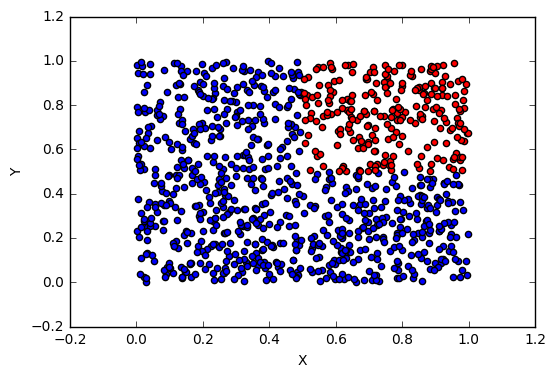

In [2]:
ax = df[df.spam == False].plot.scatter(x='X', y='Y', color='Blue')

df[df.spam == True].plot.scatter(x='X', y='Y', color='red', ax=ax)

In [13]:
from sklearn.tree import DecisionTreeClassifier

data = df[['X', 'Y']].values

gini_clf = DecisionTreeClassifier(criterion="gini")
entropy_clf = DecisionTreeClassifier(criterion="entropy")

gini_tree = gini_clf.fit(data, df['spam'])
entropy_tree = entropy_clf.fit(data, df['spam'])

# Grafiquemos el árbol


Esto sacado de https://github.com/scikit-learn/scikit-learn/issues/6261

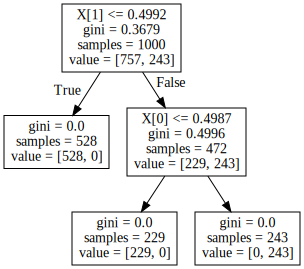

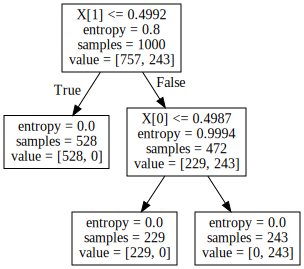

In [22]:
from sklearn.tree import export_graphviz
from IPython.display import display
import tempfile
import graphviz


def create_dotgraph(tree):
    tmpfile = tempfile.NamedTemporaryFile(mode='r+')  
    export_graphviz(tree, out_file=tmpfile.name)
    
    with open(tmpfile.name) as f:
        contents = f.read()
        display(graphviz.Source(contents))


# Por alguna razón no puedo meter esto en la función 
create_dotgraph(gini_tree)
create_dotgraph(entropy_tree)
    
